### Create new

In [ ]:

from xen.training.SequenceVAETrainer import SequenceVAETrainer

# dir = "../../../ai/trainingdata/music/mutopia_guitar/"
paths = ["../../../ai/trainingdata/music/130000_Pop_Rock_Classical_Videogame_EDM_MIDI_Archive[6_19_15]/C/C/Chrono Trigger - Robo Theme.mid"]

trainer = SequenceVAETrainer(modelPath="../models", modelName="chronorobo44")
trainer.loadSongDataset(paths, timesig='4/4', ticksPerQuarter=4, quartersPerMeasure=4, measuresPerSequence=1)
trainer.createModel(latentDim = 3, hiddenLayers = 2)


### Load Existing

In [ ]:

from xen.training.SequenceVAETrainer import SequenceVAETrainer

trainer = SequenceVAETrainer(modelPath="../models", modelName="mutopia_guitar_4-4")
trainer.loadSongDataset(["../../../ai/trainingdata/music/mutopia_guitar/"], timesig='4/4', ticksPerQuarter=4, quartersPerMeasure=4, measuresPerSequence=1)
trainer.loadModel()


### Train

In [2]:
trainer.train(batchSize = 32, epochs = 500, learning_rate = 0.005)
trainer.saveModel(quantize = None)

Train on 32 samples
Epoch 1/500


2023-07-22 15:13:38.020176: W tensorflow/c/c_api.cc:300] Operation '{name:'training/Adam/encoder_mean/kernel/v/Assign' id:654 op device:{requested: '', assigned: ''} def:{{{node training/Adam/encoder_mean/kernel/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training/Adam/encoder_mean/kernel/v, training/Adam/encoder_mean/kernel/v/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


32/32 [==============================] - 0s 15ms/sample - loss: 577.6928
Epoch 2/500
32/32 [==============================] - 0s 134us/sample - loss: 558.3156
Epoch 3/500
32/32 [==============================] - 0s 193us/sample - loss: 539.0901
Epoch 4/500
32/32 [==============================] - 0s 455us/sample - loss: 506.8223
Epoch 5/500
32/32 [==============================] - 0s 249us/sample - loss: 466.6198
Epoch 6/500
32/32 [==============================] - 0s 326us/sample - loss: 411.5603
Epoch 7/500
32/32 [==============================] - 0s 456us/sample - loss: 334.9177
Epoch 8/500
32/32 [==============================] - 0s 524us/sample - loss: 261.8126
Epoch 9/500
32/32 [==============================] - 0s 441us/sample - loss: 203.3694
Epoch 10/500
32/32 [==============================] - 0s 323us/sample - loss: 152.4031
Epoch 11/500
32/32 [==============================] - 0s 292us/sample - loss: 99.5952
Epoch 12/500
32/32 [==============================] - 0s 178us/sam

2023-07-22 15:13:47.420094: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-07-22 15:13:47.420116: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-07-22 15:13:47.420686: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/5w/xlkmsvyj2tscz43jpx6j7qt00000gn/T/tmpog6srctg
2023-07-22 15:13:47.422403: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-07-22 15:13:47.422431: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /var/folders/5w/xlkmsvyj2tscz43jpx6j7qt00000gn/T/tmpog6srctg
2023-07-22 15:13:47.427823: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2023-07-22 15:13:47.457224: I tensorflow/cc/saved_model/loader.cc:215] Running initialization op on SavedModel bundle at path: /var/folders/5w/xlkmsvyj2tscz43jpx6j7qt00000gn/T/tmpog6srctg
2023-07-

In [3]:
trainer.calcRecall()

/Users/rob/anaconda3/envs/tf/lib/python3.11/site-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2023-07-21 17:04:21.460118: W tensorflow/c/c_api.cc:300] Operation '{name:'decoder/decoder_output/Sigmoid' id:205 op device:{requested: '', assigned: ''} def:{{{node decoder/decoder_output/Sigmoid}} = Sigmoid[T=DT_FLOAT, _has_manual_control_dependencies=true](decoder/decoder_output/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


65.625% recall


### Visualise Latent Space

2023-07-21 17:04:25.213734: W tensorflow/c/c_api.cc:300] Operation '{name:'encoder_mean/BiasAdd' id:73 op device:{requested: '', assigned: ''} def:{{{node encoder_mean/BiasAdd}} = BiasAdd[T=DT_FLOAT, _has_manual_control_dependencies=true, data_format="NHWC"](encoder_mean/MatMul, encoder_mean/BiasAdd/ReadVariableOp)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


[ 1.4827656  -1.2141905   2.8606894  -0.2555337   1.4827656  -1.1756657
  0.5675604  -1.261263   -0.24964346 -2.1201675   0.6808312  -2.21167
 -0.24964346  1.5665519  -0.16852462 -0.32133713 -0.8300752   0.6281074
 -0.835793   -1.0543995  -0.8300752   0.6281074  -0.835793    1.5253257
 -0.03305    -1.19119    -0.03305    -1.19119    -0.03305    -1.19119
  1.8911561   1.8911561 ]


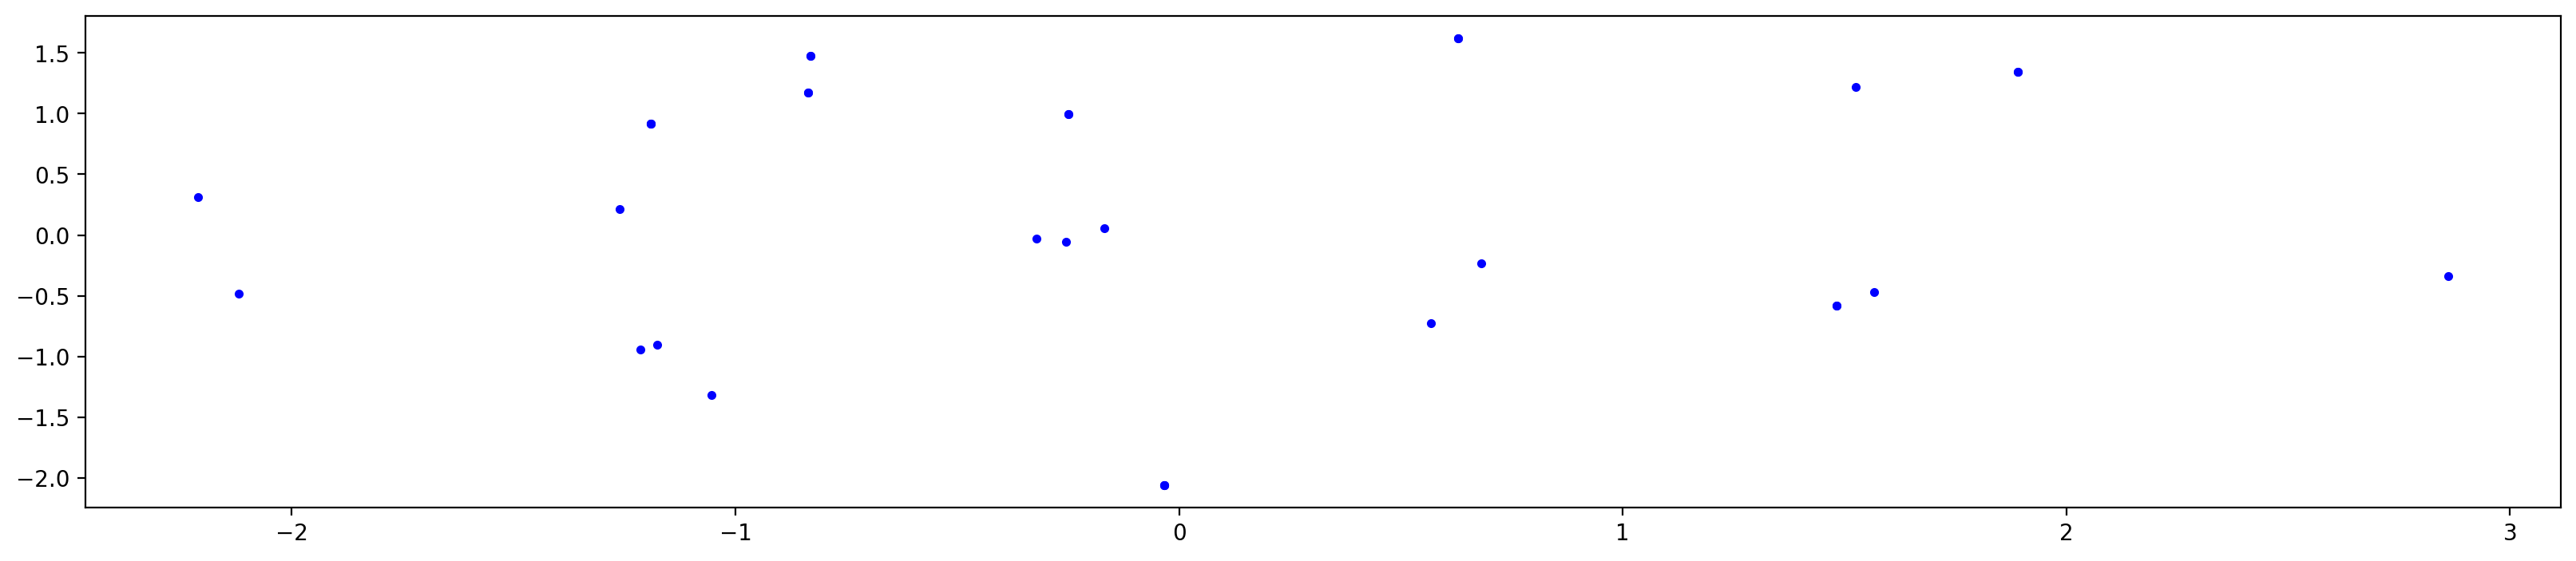

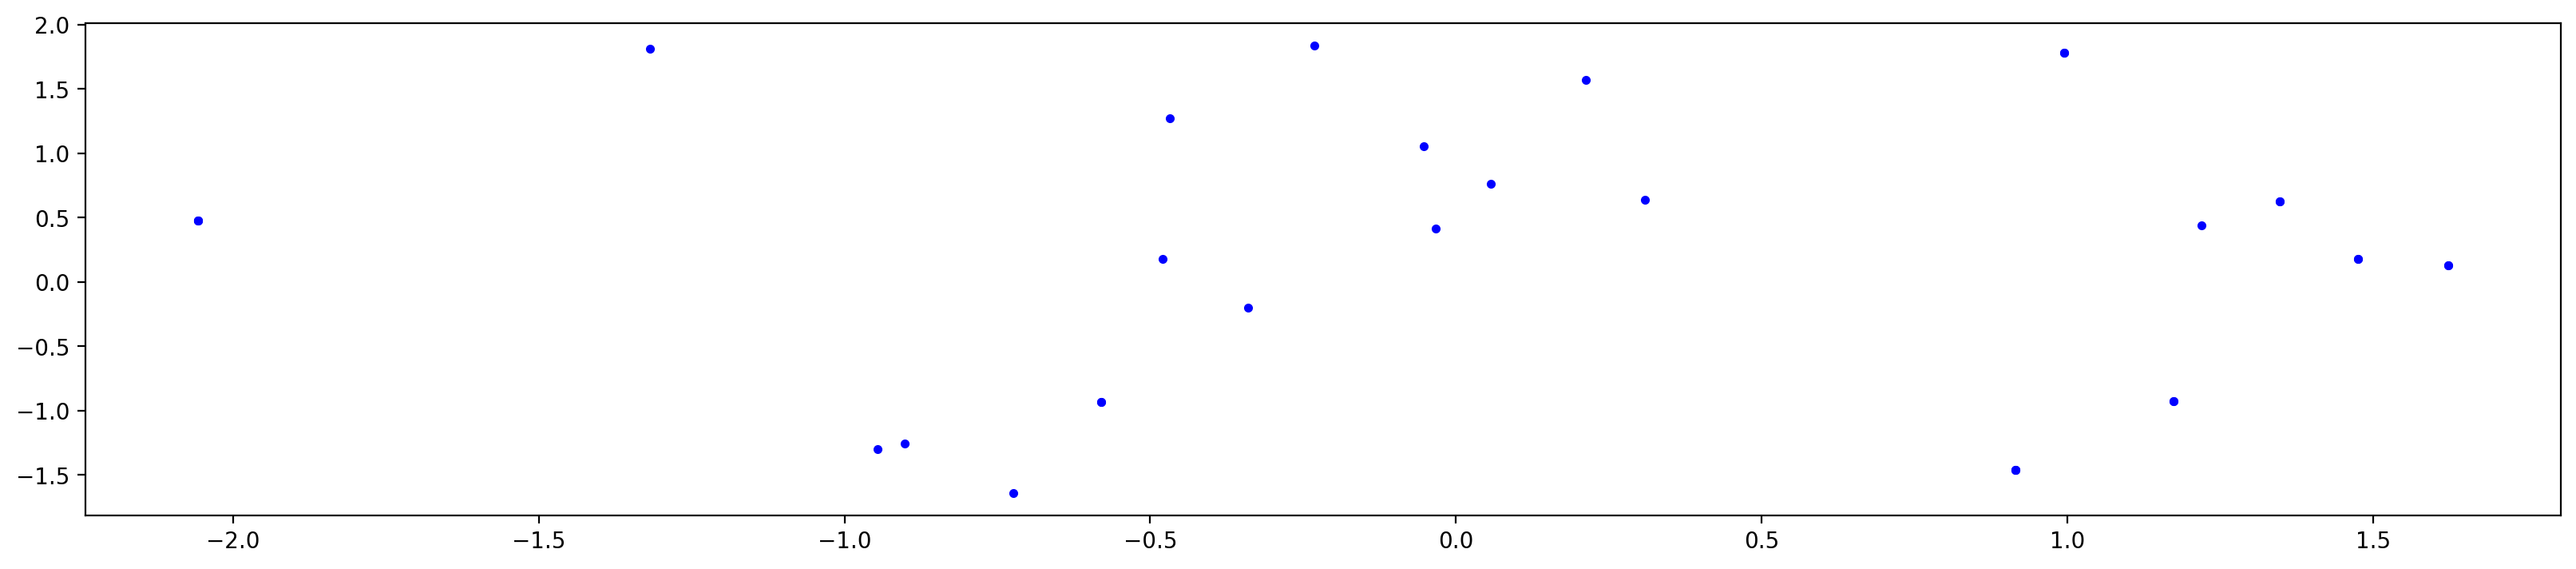

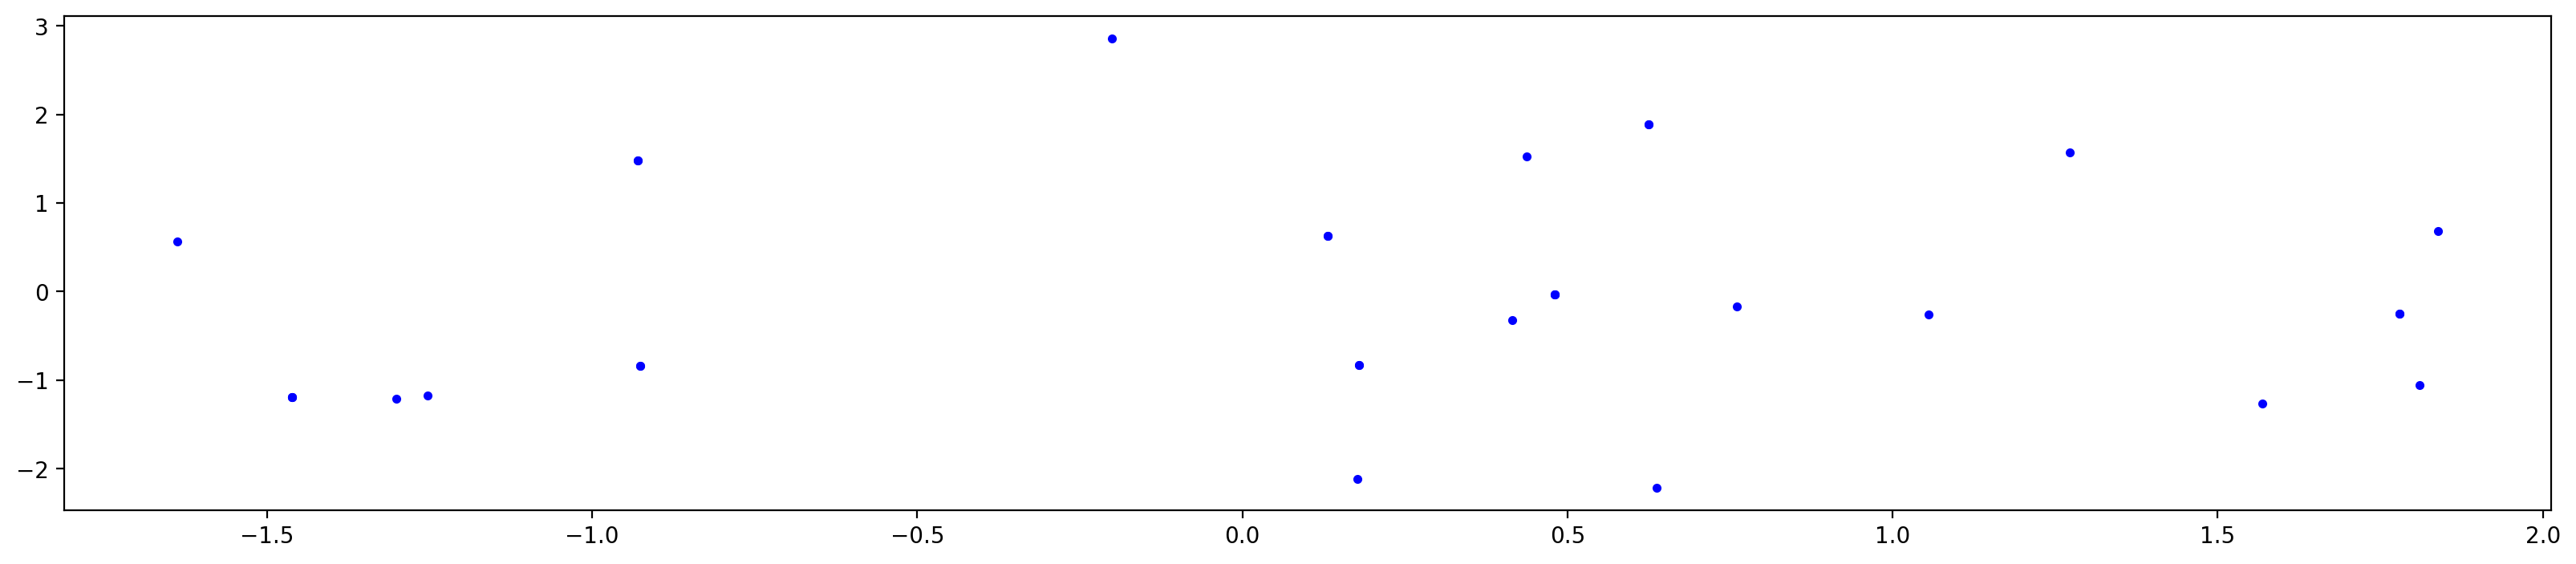

In [4]:
trainer.plotLatentSpace()

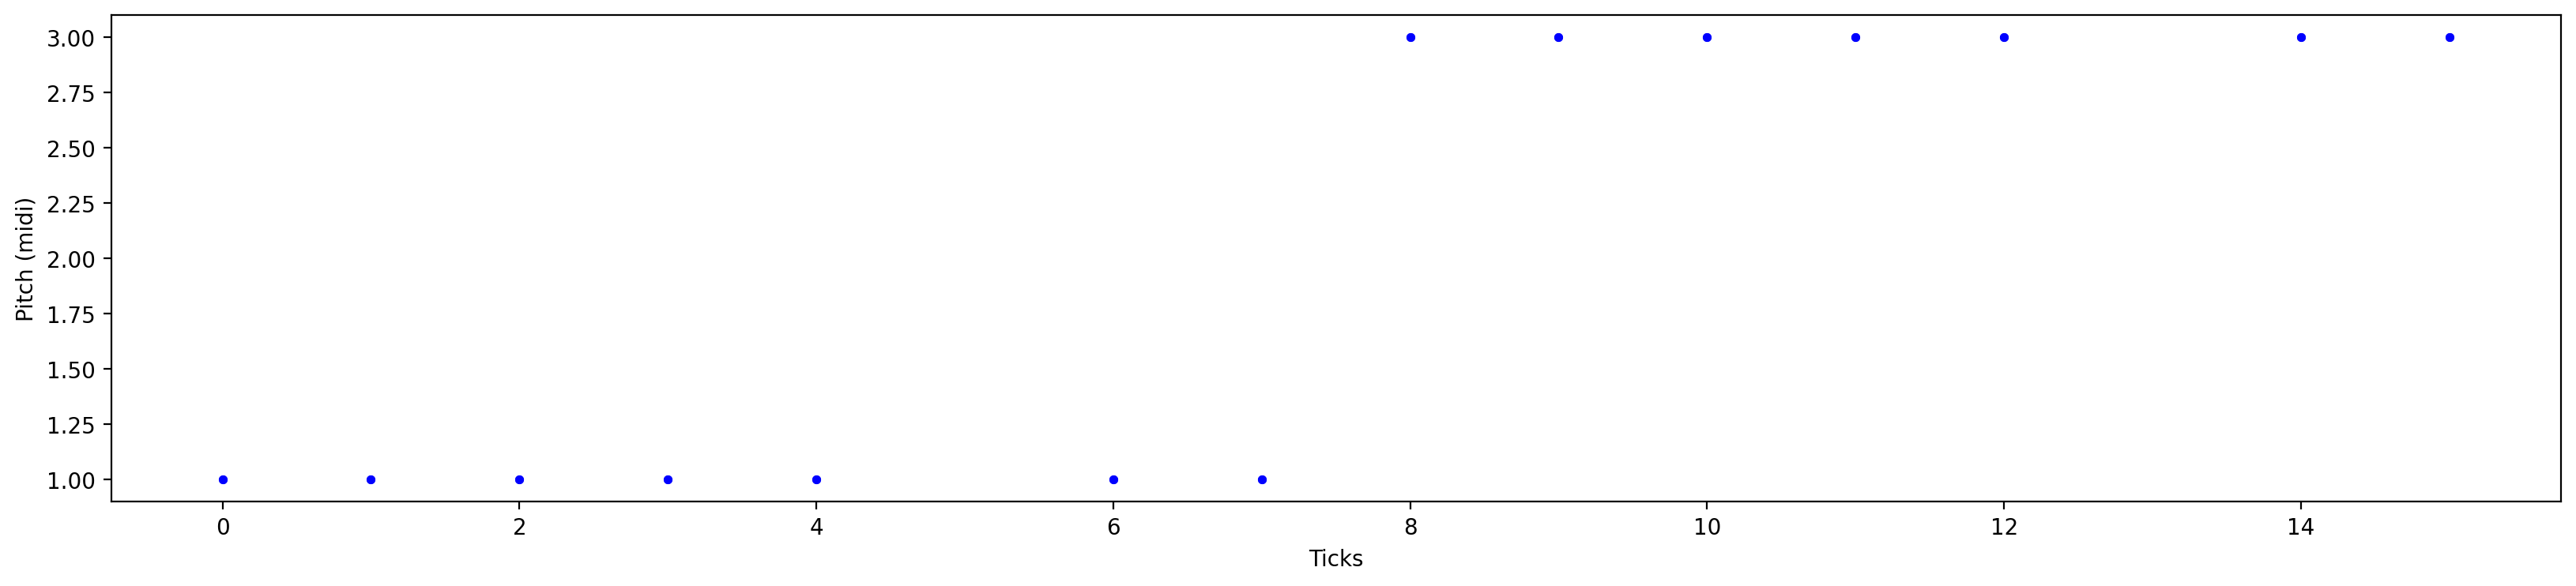

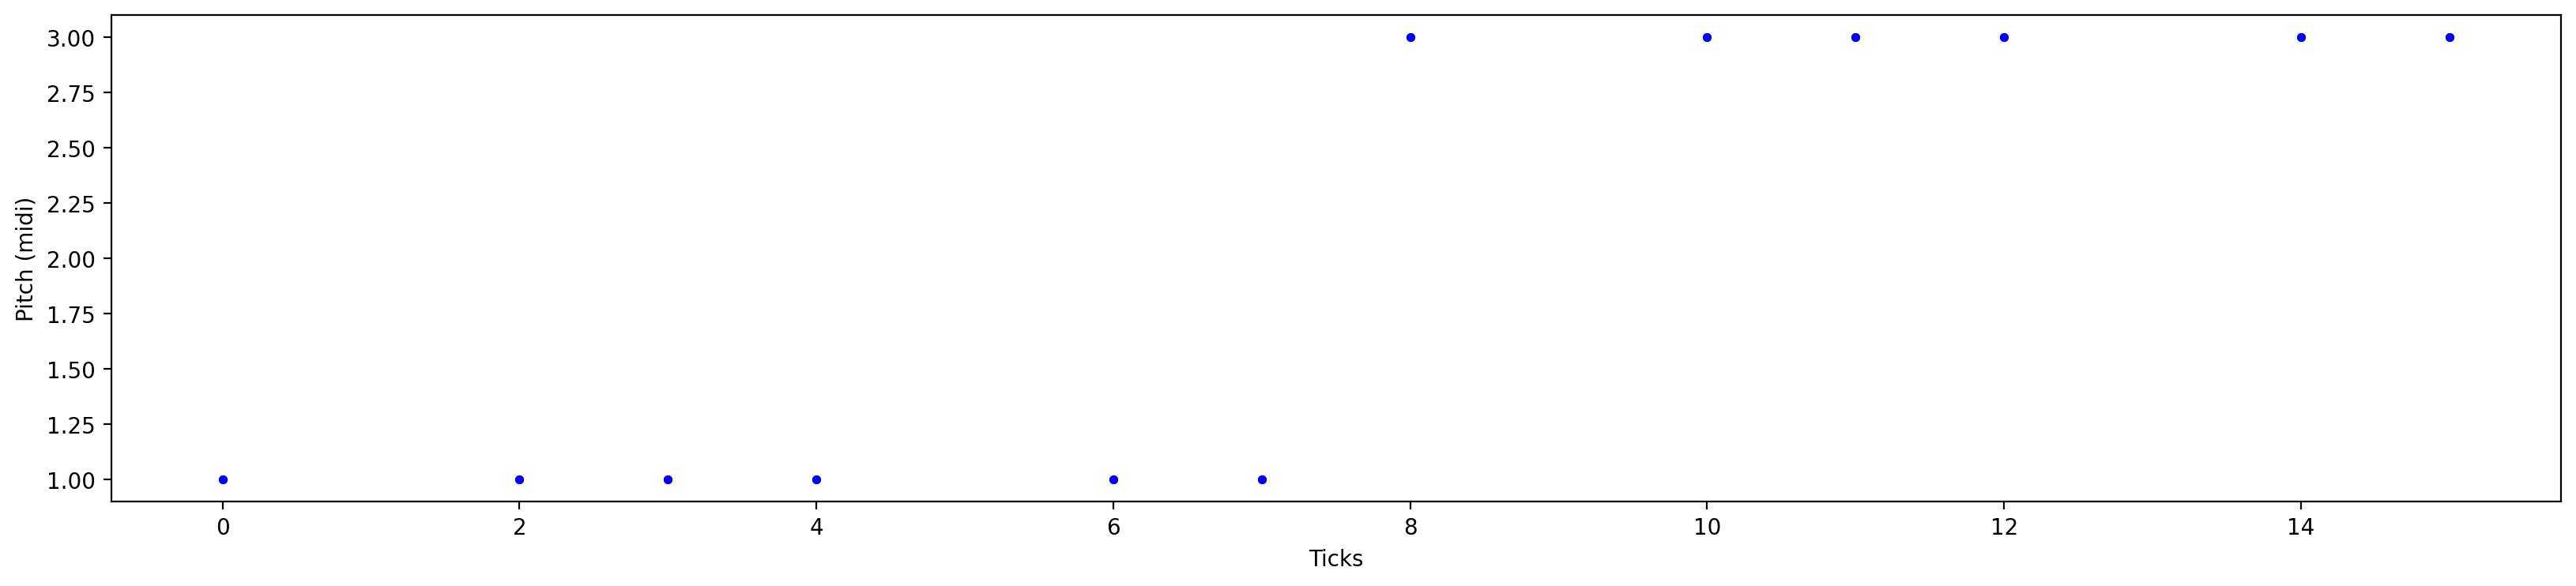

In [12]:
trainer.plotInputOutputSequence(27)

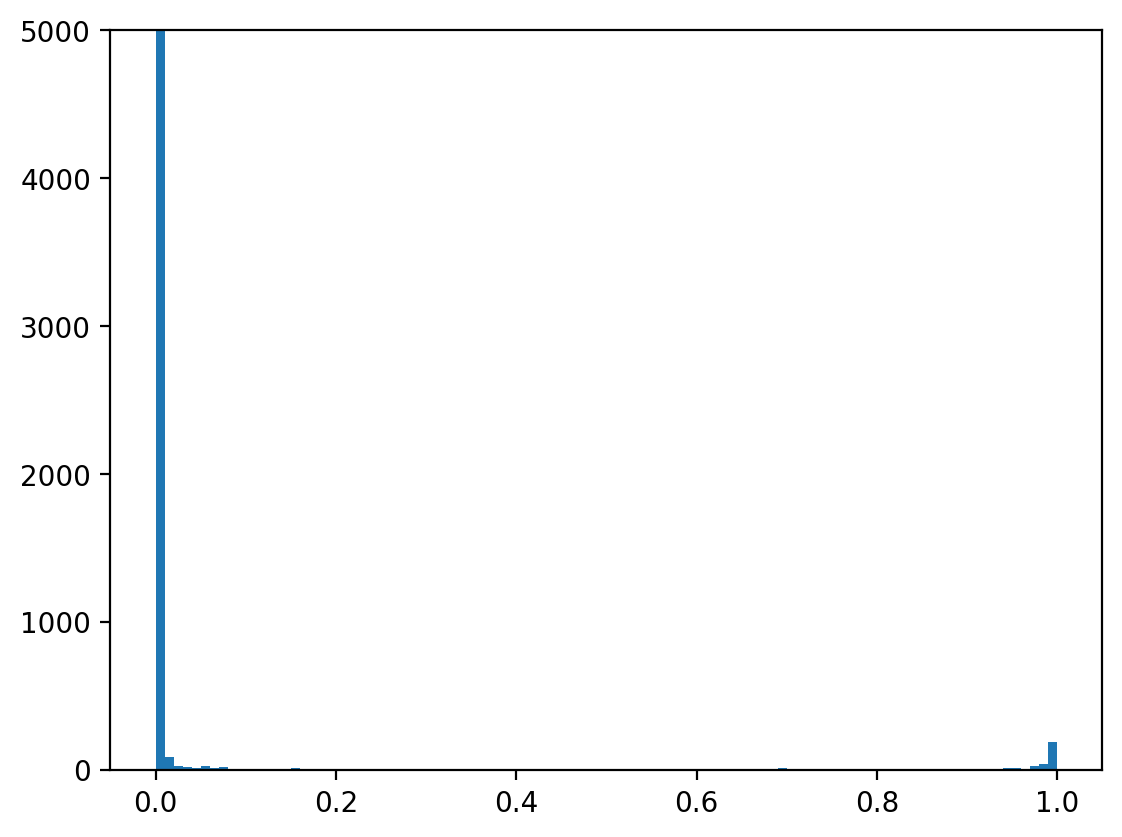

In [7]:
trainer.plotOutputValueDistribution()